### Analyzing Some Ocean Model Output

Below is a some code that uses the [Pangeo stack](https://pangeo.io/) to read in output from the ocean component of the CESM model.
This run was done on a nominally 3-degree resolution grid with 11600 total cells.
The output file contains monthly averages for two variables: sea surface temperature (`SST`) and air-sea CO2 flux (`FG_CO2`).
The area of each grid cell is also included (`TAREA`).

We use [xarray](http://xarray.pydata.org/en/stable/) to read in the data, but you don't need to know anything about that package.
There are a few [numpy](https://numpy.org/) functions that will be useful, and we provide an example of them below.
If you run into trouble, please do not hesitate to reach out.

In [1]:
import numpy as np
import xarray as xr

In [2]:
ds = xr.open_dataset('SST_and_CO2FLUX.nc')
ds

<xarray.Dataset>
Dimensions:  (nlat: 116, nlon: 100, time: 12)
Coordinates:
  * time     (time) object 0001-01-17 00:57:36 ... 0001-12-16 12:00:00
    TLONG    (nlat, nlon) float64 ...
    TLAT     (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    TAREA    (nlat, nlon) float64 ...
    SST      (time, nlat, nlon) float32 ...
    FG_CO2   (time, nlat, nlon) float32 ...
Attributes:
    title:             c.e22.T62_g37.C1850ECO.1_year
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2020-10-30 at 14:04:49.4
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

#### What does this data look like?

`xarray` can plot data using `matplotlib`.
For example, below is a plot of the January CO2 flux.

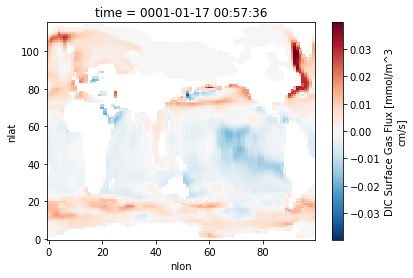

In [3]:
ds.isel(time=0)["FG_CO2"].plot()

Note that the white coloring for land is a `nan` value rather than a 0.
The following cell uses some `numpy` functions to show that there are ~3700 land cells:
`isnan` returns `True` where the array is `nan` rather than real-valued and `False` elsewhere;
`where` creates an array that is 1s where the condition is true and 0 where it is false.

In [4]:
np.sum(np.where(np.isnan(ds.isel(time=0)["FG_CO2"].values), 1, 0))

3689

#### Computing the global mean.

Below we have started to write a function that takes an `xarray` dataset and two variables name as arguments:
it should return the global average of the first variable assuming each grid cell area is provided in the second variable.

In [5]:
def compute_weighted_mean(ds, name_of_variable_to_average : str, cell_area_variable_name : str):
    """
    Computes a weighted mean of a variable in an xarray Dataset;
    Weights should be 0 in cells where the variable value is nan
    and the area of the cell everywhere else
    """
    # (1) Set up an array for the global mean of each time slice
    global_mean = []
    cell_areas = ds[cell_area_variable_name].values

    # (2) For each time slice, compute the global mean
    for n in range(len(ds["time"])):
        # i. pull out correct month of data
        data_to_avg = ds[name_of_variable_to_average].isel(time=n).values   

        # TODO: ii. compute the weights
#         wgts = 

        # TODO: iii. compute the mean
#         mean =

        # iv. error checking
        if np.isnan(mean):
            print("WARNING: your mean is nan!")

        # v. append mean to list
        global_mean.append(mean)

    # convert list to xarray DataArray
    da_out = xr.DataArray(global_mean, dims='time', coords={'time' : ds["time"]})
    da_out.attrs['units'] = ds[name_of_variable_to_average].attrs['units']

    # return DataArray
    return da_out

In [6]:
da = compute_weighted_mean(ds, "FG_CO2", "TAREA")
da2 = compute_weighted_mean(ds, "SST", "TAREA")

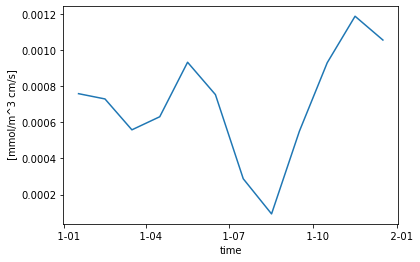

In [7]:
da.plot()

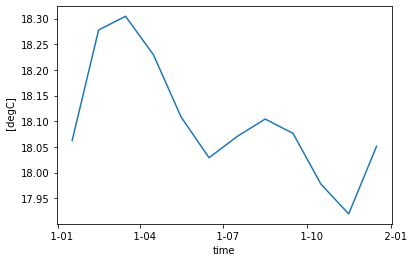

In [8]:
da2.plot()